In [1]:
""" IMPORT NEEDED MODULES """

import pandas as pd
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import cmocean
import cmocean.cm as cmo

import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

import time as t
import torch.optim as optim
from torch.autograd import Variable
from torchvision import transforms
from torch.utils.data.dataset import Dataset  # For custom datasets

In [2]:
startingDir = os.getcwd()
print(startingDir)

C:\Users\Peter\Desktop\Thermo_R_Code\FinalThermo\new2


In [3]:
def get_time(filename):
    return filename[11:13] + ":" + filename[14:16]
csvfilesMLLocation = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/csvdata10000"
masterfileMLLocation = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/csvdata10000/populatedGPPs.csv"
plotLocation = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/tempplots"


data_info = pd.read_csv(masterfileMLLocation)
# First column contains thermal image (csv's) file paths
thermal_path_arr = np.asarray(data_info.iloc[:,0])
# Second column is the GPP values for the images from first column
GPP_arr = np.asarray(data_info.iloc[:,1])

9834TEMP.png
39.15911064329789
27.1988509509866


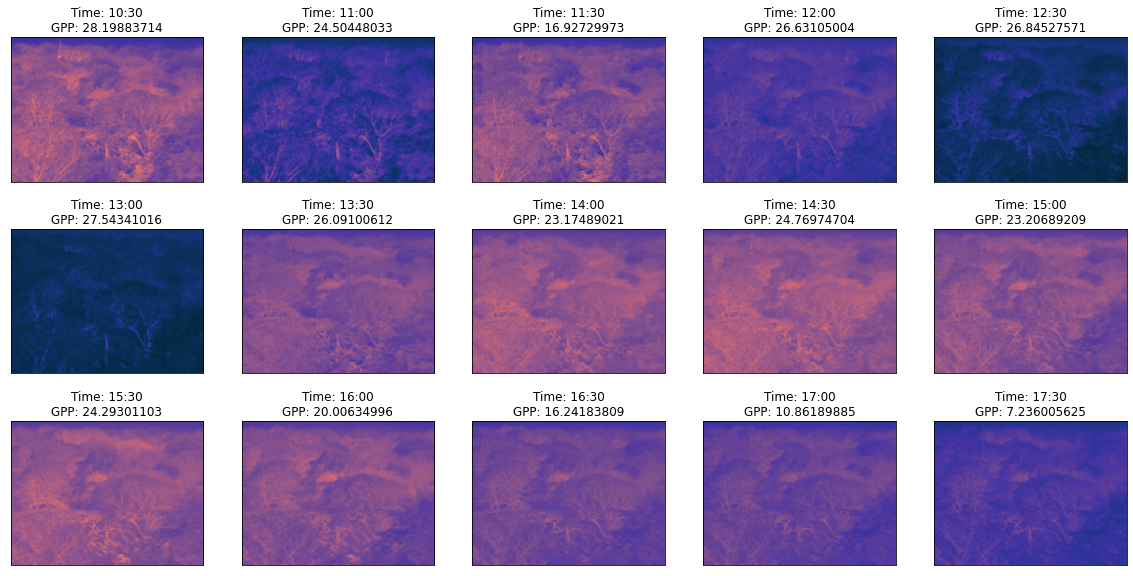

In [139]:


#print(get_time(thermal_path_arr[0]))

#ABS_MAX = 43.8977567043499
#ABS_MIN = 22.0574247607658
ABS_MAX = -10
ABS_MIN = 10000
os.chdir(csvfilesMLLocation)

# SET STARTTHREE TO file number from populatedGPPS that you would like to start from, will jump 30 minute jumps to get
# gpp and put in plot

fig = plt.figure(figsize=(20, 10))
startThree = 9750
step = 6
sqHeight = 3
sqWidth = 5
sqArea = sqHeight * sqWidth
increment = sqArea * step

for number in range(startThree, startThree+increment, step):
    pd_thermal_img = pd.read_csv(thermal_path_arr[number])
    np_thermal_img_old = np.asarray(pd_thermal_img)
    tempMax = np.max(np_thermal_img_old)
    tempMin = np.min(np_thermal_img_old)
    if(tempMax > ABS_MAX):
        ABS_MAX = tempMax
    if(tempMin < ABS_MIN):
        ABS_MIN = tempMin
        


for number in range(startThree, startThree+increment, step):
    numPlot = int((number - startThree)/6) + 1
    ax = fig.add_subplot(sqHeight, sqWidth, numPlot, xticks=[], yticks=[])
    time = get_time(thermal_path_arr[number])
    gpp = GPP_arr[number]
    pd_thermal_img = pd.read_csv(thermal_path_arr[number])
    np_thermal_img_old = np.asarray(pd_thermal_img)
    np_thermal_img_new = ((np_thermal_img_old-ABS_MIN)/(ABS_MAX - ABS_MIN))
    myTitle = "Time: " + time + "\nGPP: " + str(gpp)
    #print(np.max(np_thermal_img_new))
    plt.imshow(np.rot90(np.squeeze(np_thermal_img_new)), vmin=0, vmax=1, cmap="cmo.thermal")
    ax.set_title(myTitle)
    #plt.colorbar()
    

saveName = str(number) + "TEMP.png"
print(saveName)
print(ABS_MAX)
print(ABS_MIN)
os.chdir(plotLocation)
fig.savefig(saveName, bbox_inches = "tight")
os.chdir(csvfilesMLLocation)
    

os.chdir(startingDir)

In [4]:
ABS_MAX = -10
ABS_MIN = 10000
os.chdir(csvfilesMLLocation)

startThree = 0
step = 6
sqSize = 4
sqArea = sqSize * sqSize
increment = sqArea * step

for number in range(startThree, startThree+increment, step):
    pd_thermal_img = pd.read_csv(thermal_path_arr[number])
    np_thermal_img_old = np.asarray(pd_thermal_img)
    tempMax = np.max(np_thermal_img_old)
    tempMin = np.min(np_thermal_img_old)
    if(tempMax > ABS_MAX):
        ABS_MAX = tempMax
    if(tempMin < ABS_MIN):
        ABS_MIN = tempMin
print(ABS_MAX)
print(ABS_MIN)





35.6541326965399
24.784540025387397


In [109]:
tempval = 29.41536616



print(((tempval-ABS_MIN)/(ABS_MAX - ABS_MIN)))

0.4260349283283308


2015_03_14_19_00_bci_GPP_0_0
(240, 320)
(37, 319)
37 319
finish


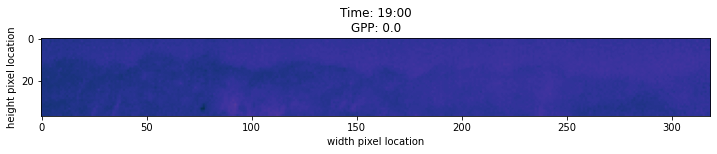

In [126]:

# Need to do 0
# need to do 24
# need to do 36
# need to do 48
# Need to do 72
# Need to do 84
os.chdir(csvfilesMLLocation)
number = 60
gppStr = (str(GPP_arr[number])[0:4]).replace(".","_")
saveName = (thermal_path_arr[number])[0:20] + "_GPP_" + gppStr
print(saveName)
pd_thermal_img = pd.read_csv(thermal_path_arr[number])
np_thermal_img_old = np.asarray(pd_thermal_img)
np_thermal_img_new = ((np_thermal_img_old-ABS_MIN)/(ABS_MAX - ABS_MIN))

# img = np.rot90(np.squeeze(np_thermal_img_new))
# imggrid = np.ix_([0, 4], [5, 7])
# print("imggrid", imggrid)
# img = img[0::9,0::2]
# print(img.shape)
# print(img)
# # becomes 24, 32

img = np.rot90(np.squeeze(np_thermal_img_new))
print(img.shape)
img = img[1:38, 1:320]
print(img.shape)
#print(img)
# becomes 24, 32

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, vmin=0, vmax=1, cmap="cmo.thermal")
time = get_time(thermal_path_arr[number])
gpp = GPP_arr[number]
plt.xlabel("width pixel location")
plt.ylabel("height pixel location")
myTitle = "Time: " + time + "\nGPP: " + str(gpp)
plt.title(myTitle)
width, height = img.shape
print(width, height)
thresh = img.max()/2.5
# for x in range(width-230):
#     for y in range(height-310):
#         print(x,y)
#         val = round(img[x][y],2) if img[x][y] != 0 else 0
#         print()
#         ax.annotate(str(val), xy=(y,x),
#                     horizontalalignment='center',
#                     verticalalignment='center',
#                     color='white' if img[x][y]<thresh else 'black')
print("finish")
os.chdir(plotLocation)
fig.savefig((saveName), bbox_inches = "tight")
os.chdir(csvfilesMLLocation)

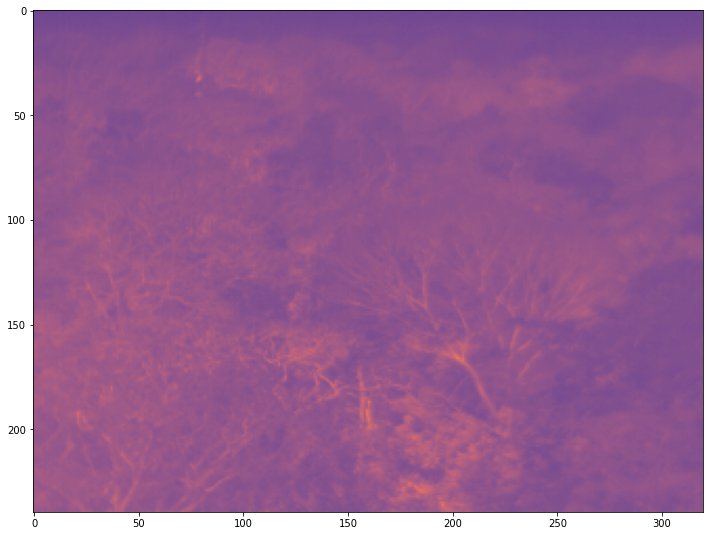

In [134]:
maxh = 43.8977567043499
minh = 22.0574247607658
from PIL import Image
from matplotlib import cm
os.chdir(csvfilesMLLocation)
saveName = "2015_03_29_12_00_bci_t"

pd_thermal_img = pd.read_csv(saveName + ".csv")
np_thermal_img_old = np.asarray(pd_thermal_img)
myarray = ((np_thermal_img_old-minh)/(maxh - minh))
im = Image.fromarray(np.uint8(cm.gist_earth(np.rot90(myarray))*255))
os.chdir(plotLocation)
im.save("badresult13_15.png")

img = np.rot90(myarray)
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, vmin=0, vmax=1, cmap="cmo.thermal")
fig.savefig(("BAD" + saveName), bbox_inches = "tight")